### Packages and Data import

In [2]:
# import packages!

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import cc data from data dir

df = pd.read_csv('../data/creditcard.csv')

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocess

In [5]:
# transform 'Time' in 'Hour of the day'

df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))

# drop 'Time'
df.drop('Time', axis=1, inplace=True)

# Descriptive visualization

In [6]:
# create pivot table
t_over_time = df.pivot_table(values='Amount',index='Hour',columns='Class',aggfunc='count')

# create rel columns
t_over_time['fraud_perc'] =  t_over_time[1]/t_over_time[1].sum()
t_over_time['norm_perc'] =  t_over_time[0]/t_over_time[0].sum()

# del abs columns
t_over_time.drop(0, axis=1, inplace=True)
t_over_time.drop(1, axis=1, inplace=True)

t_over_time.head()

Class,fraud_perc,norm_perc
Hour,,
0,0.042683,0.038405
1,0.012195,0.027037
2,0.020325,0.014815
3,0.115854,0.011498
4,0.034553,0.012226


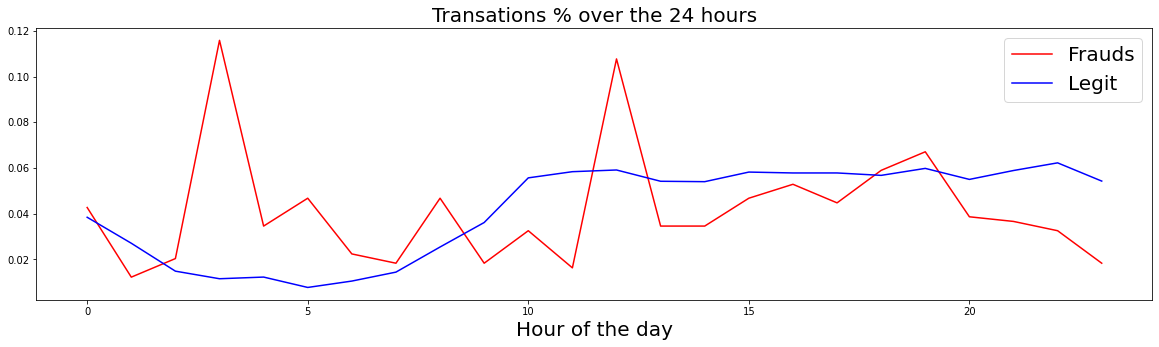

In [7]:
# plot

plt.figure(figsize=(20,5))
plt.title('Transations % over the 24 hours',fontsize=20)
plt.plot(t_over_time.index, t_over_time.fraud_perc, c = 'r', label = 'Frauds')
plt.plot(t_over_time.index, t_over_time.norm_perc, c = 'b', label = 'Legit')
plt.xlabel('Hour of the day',fontsize=20)
plt.legend(fontsize=20)

# Parametric Models

In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve

In [9]:
X = pd.concat([df.iloc[:,-1],df.loc[:,'V1':'Amount']],axis=1)
y = df['Class']

,Hour,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,1,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
# Scale features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [12]:
# train test split mantaining y proportion of classes
'''Stratify = y: It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.'''

x_train,x_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size=0.30, random_state=1)

print(f'y_train class counts:\n {y_train.value_counts()} \n')
print(f'y_test class counts:\n {y_test.value_counts()}')

y_train class counts:
 0    199020
1       344
Name: Class, dtype: int64 

y_test class counts:
 0    85295
1      148
Name: Class, dtype: int64


## Logistic Regression

In [13]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_test)

In [14]:
print('True Classes')
print([y_test.value_counts()[0],0],'\n' ,[0,y_test.value_counts()[1]])
print('\n')
print('Predicted Classes')
print(confusion_matrix(y_test,pred))

True Classes
[85295, 0] 
 [0, 148]


Predicted Classes
[[85284    11]
 [   46   102]]


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85295
       Fraud       0.90      0.69      0.78       148

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



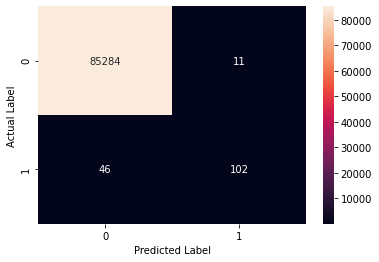

In [15]:
cnf_matrix = confusion_matrix(y_test,pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test,pred, target_names=['Non-fraud','Fraud']))

Text(33.0, 0.5, 'True label')

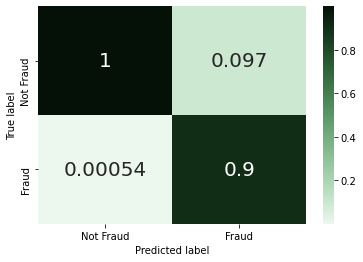

In [18]:
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")

In [ ]:
# 